<a href="https://colab.research.google.com/github/Suyash35565/Encryptix/blob/main/CUSTOMERCHURNPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [37]:
data=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

In [7]:
print("Number of rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of rows 10000
Number of columns 14


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
data = pd.get_dummies(data,drop_first=True)

In [16]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [17]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [18]:
import seaborn as sns


<Axes: ylabel='count'>

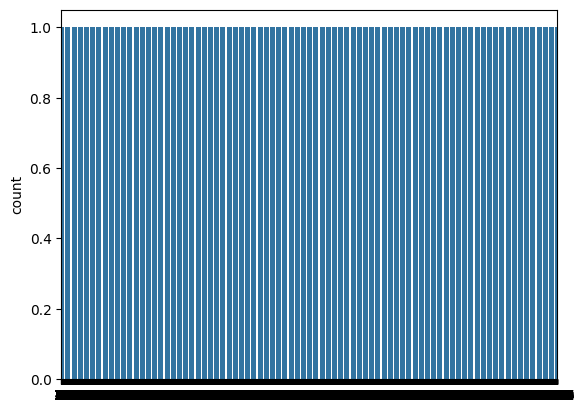

In [19]:
sns.countplot(data['Exited'])


In [20]:
x=data.drop(['Exited'],axis=1)
y=data['Exited']


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,satify=y)

TypeError: got an unexpected keyword argument 'satify'

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [31]:
ypred1=log.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [33]:
accuracy_score(y_test,ypred1)

0.808

In [34]:
from sklearn.metrics import confusion

ModuleNotFoundError: No module named 'skleaen'

In [39]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [41]:
precision_score(y_test,ypred1)

0.5891472868217055

In [42]:
recall_score(y_test,ypred1)

0.18673218673218672

In [44]:
f1_score(y_test,ypred1)

0.2835820895522388

In [49]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and ypred1 are your true and predicted labels respectively
tn, fp, fn, tp = confusion_matrix(y_test, ypred1).ravel()

pc = tp / (fp + tp)
print(pc)

0.5891472868217055


In [50]:
 from imblearn.over_sampling import SMOTE
 x_res,y_res=SMOTE().fit_resample(x,y)

In [51]:
y_res.value_counts()


,count
Exited,
1,7963
0,7963


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [56]:

log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [57]:
ypred1=log.predict(x_test)

In [58]:
accuracy_score(y_test,ypred1)

0.7711864406779662

In [59]:
accuracy_score(y_test,ypred1)

0.7711864406779662

In [61]:
recall_score(y_test,ypred1)

0.7669027688345138

In [62]:
f1_score(y_test,ypred1)

0.7656702025072323

In [63]:
from sklearn import svm

In [64]:
svm=svm .SVC()
svm.fit(x_train,y_train)

SVC()

In [65]:
y_pred2=svm.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred2)

0.8418079096045198

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
Y_pred3=knn.predict(x_test)

In [72]:
accuracy_score(y_test,Y_pred3)

0.8173258003766478

In [74]:
from sklearn.metrics import precision_score

precision_score(y_test, Y_pred3)  # Corrected function name and imported

0.8032479700187383

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
Y_PRED4=dt.predict(x_test)

In [77]:
accuracy_score(y_test,Y_PRED4)

0.8101067168863779

In [78]:
precision_score(y_test, Y_PRED4)

0.7890243902439025

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred5=rf.predict(x_test)

In [80]:
 accuracy_score(y_test,y_pred5)

0.8706842435655995

In [81]:
precision_score(y_test, y_pred5)

0.8659397049390635

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred6=gb.predict(x_test)

In [84]:
accuracy_score(y_test,y_pred6)

0.8389830508474576

In [85]:
PRESCISCION_SCORE=precision_score(y_test,y_pred6)
PRESCISCION_SCORE

0.8385416666666666

In [86]:
import seaborn as sns

In [87]:
x_res=pd.DataFrame(x_res)

In [88]:
rf.fit(x_res,y_res)

RandomForestClassifier()